### Analysis of Plasma proteomes based on MS1 and MS2 information

This jupyter notebook allows to analyze proteome discover output using exiting data from identified plasma proteins to re-score. 

In [279]:
import pandas as pd
import seaborn as sns
import re
import numpy as np 
import matplotlib.pyplot as plt

Load the public plasma proteome: 

**Gen**: Gen accession number
**Description**: Protein name
**Log_Conc**: Concentration Log2-based 
**Zscore**: Zscore per proteins
**Pvlue**: P value per proteins based on Zscore (probability in a normal distribution)

In [280]:
public_plasma_proteome = pd.read_csv("data/public-plasma-proteome.csv")
public_plasma_proteome.head()

,Gene,Description,Log_Conc,Zscore,PPvalue
0,ALB,Albumin,25.253497,4.531879,0.999997
1,CP,Ceruloplasmin,19.662752,3.489888,0.999758
2,GSN,Gelsolin,18.960138,3.358936,0.999609
3,RBP4,Retinol binding protein 4,18.680030,3.306730,0.999528
4,C3,Complement C3,17.931569,3.167234,0.999231


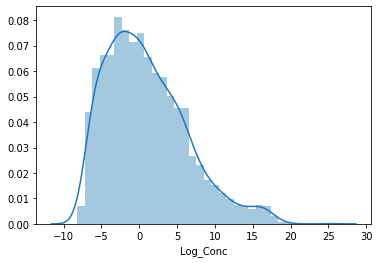

In [281]:
sns.distplot(public_plasma_proteome.Log_Conc)

Load internal database of plasma proteins: 

**Uniprot_Accession**: Uniprot accession 
**Pvalue**: P value based in the Zscore

In [282]:
inhouse_plasma_proteome = pd.read_csv("data/custom-plasma-proteome.csv")
inhouse_plasma_proteome.head()

,UniprotAccession,Pvalue
0,A0A075B6H7,0.380322
1,A0A075B6H9,0.493844
2,A0A075B6I0,0.590413
3,A0A075B6I1,0.238156
4,A0A075B6I4,0.238156


In [283]:
dataset = pd.read_csv("data/sample-example.csv")
dataset.head()

,UniprotAccession,Description,Globulins,PSMs,Abundance[S4],Abundance[S37],Abundance[S38],Abundance[S39],Abundance[S40],Abundance[S41],...,Found[S37],Found[S38],Found[S39],Found[S40],Found[S41],Found[S42],Found[S43],Found[S44],Found[S45],Gene
0,Q9Y3D6,Mitochondrial fission 1 protein OS=Homo sapien...,0,33,2.458242e+05,196345.65190,21321.138670,2643.908936,107823.93750,24494.51367,...,Peak Found,Peak Found,Peak Found,Peak Found,Peak Found,Peak Found,Peak Found,Peak Found,Peak Found,FIS1
1,Q6UY14,ADAMTS-like protein 4 OS=Homo sapiens OX=9606 ...,0,9,3.391171e+04,19308.35547,51113.827150,3389.173340,22343.27148,26381.99512,...,Peak Found,Peak Found,Peak Found,Peak Found,Peak Found,Peak Found,Peak Found,Peak Found,Peak Found,ADAMTSL4
2,O95340,Bifunctional 3'-phosphoadenosine 5'-phosphosul...,0,10,2.463229e+03,NaN,15918.753910,3854.183838,33735.15625,77540.17773,...,Not Found,Peak Found,Not Found,Peak Found,Peak Found,Peak Found,Peak Found,Not Found,Not Found,PAPSS2
3,Q96EI5,Transcription elongation factor A protein-like...,0,4,1.141564e+05,NaN,2213.285889,4548.162598,NaN,NaN,...,Not Found,Peak Found,Peak Found,Not Found,Not Found,Peak Found,Not Found,Not Found,Not Found,TCEAL4
4,Q9UBF2,Coatomer subunit gamma-2 OS=Homo sapiens OX=96...,0,47,5.057266e+06,NaN,77286.744140,5104.402832,95535.07031,453259.47270,...,Not Found,Peak Found,Not Found,Peak Found,Peak Found,Peak Found,Peak Found,Peak Found,Peak Found,COPG2


In [284]:
dataset = pd.merge(dataset, inhouse_plasma_proteome, on="UniprotAccession", how='outer')
dataset = pd.merge(dataset, public_plasma_proteome, on="Gene", how='outer')
dataset.head()

,UniprotAccession,Description_x,Globulins,PSMs,Abundance[S4],Abundance[S37],Abundance[S38],Abundance[S39],Abundance[S40],Abundance[S41],...,Found[S42],Found[S43],Found[S44],Found[S45],Gene,Pvalue,Description_y,Log_Conc,Zscore,PPvalue
0,Q9Y3D6,Mitochondrial fission 1 protein OS=Homo sapien...,0.0,33.0,2.458242e+05,196345.65190,21321.138670,2643.908936,107823.93750,24494.51367,...,Peak Found,Peak Found,Peak Found,Peak Found,FIS1,NaN,"Fission, mitochondrial 1",-0.761213,-0.316688,0.375740
1,Q6UY14,ADAMTS-like protein 4 OS=Homo sapiens OX=9606 ...,0.0,9.0,3.391171e+04,19308.35547,51113.827150,3389.173340,22343.27148,26381.99512,...,Peak Found,Peak Found,Peak Found,Peak Found,ADAMTSL4,0.400645,ADAMTS like 4,5.554589,0.860438,0.805226
2,O95340,Bifunctional 3'-phosphoadenosine 5'-phosphosul...,0.0,10.0,2.463229e+03,NaN,15918.753910,3854.183838,33735.15625,77540.17773,...,Peak Found,Peak Found,Not Found,Not Found,PAPSS2,NaN,NaN,NaN,NaN,NaN
3,Q96EI5,Transcription elongation factor A protein-like...,0.0,4.0,1.141564e+05,NaN,2213.285889,4548.162598,NaN,NaN,...,Peak Found,Not Found,Not Found,Not Found,TCEAL4,NaN,NaN,NaN,NaN,NaN
4,Q9UBF2,Coatomer subunit gamma-2 OS=Homo sapiens OX=96...,0.0,47.0,5.057266e+06,NaN,77286.744140,5104.402832,95535.07031,453259.47270,...,Peak Found,Peak Found,Peak Found,Peak Found,COPG2,NaN,Coatomer protein complex subunit gamma 2,-4.643856,-1.040326,0.149094


In [285]:
def compute_probability(row, sample):
    if np.isnan(row['Pvalue']):
        pvalue = 0
    else:
        pvalue = row['Pvalue']
    
    if np.isnan(row['PPvalue']):
        ppvalue = 0
    else:
        ppvalue = row['PPvalue']
        
    abundance = pvalue + ppvalue - (pvalue * ppvalue)
    if pvalue == 0 and ppvalue == 0:
        abundance = 0.009

    if row['Found[' + sample + ']'] == 'High':
        abundance = 1 * row['Abundance[' + sample + ']']
    if row['Found[' + sample + ']'] == 'Peak Found':
        abundance = abundance * row['Abundance[' + sample + ']']
    if row['Globulins'] == 1: 
        abundance = 1 * row['Abundance[' + sample + ']'] 

    return abundance

def is_decoy(row): 
    decoy = 0
    if np.isnan(row['Pvalue']) and np.isnan(row['PPvalue']):
        decoy = 1
    if row['Found[' + sample + ']'] == 'High' or row['Globulins'] == 1:
        decoy = 0
    return decoy    

samples = []
for column in list(dataset.columns.values):
    m = re.search(r"\[([A-Za-z0-9_]+)\]", column)
    if m is not None and (len(m.group(1))):
        samples.append(m.group(1))

samples = np.unique(np.array(samples))
for sample in samples:
    dataset['AbundanceRecall[' + sample + ']'] = dataset.apply(lambda row: compute_probability(row, sample), axis=1)
    dataset['Decoy[' + sample + ']'] = dataset.apply(lambda row: is_decoy(row), axis=1)
dataset.head()

,UniprotAccession,Description_x,Globulins,PSMs,Abundance[S4],Abundance[S37],Abundance[S38],Abundance[S39],Abundance[S40],Abundance[S41],...,AbundanceRecall[S41],Decoy[S41],AbundanceRecall[S42],Decoy[S42],AbundanceRecall[S43],Decoy[S43],AbundanceRecall[S44],Decoy[S44],AbundanceRecall[S45],Decoy[S45]
0,Q9Y3D6,Mitochondrial fission 1 protein OS=Homo sapien...,0.0,33.0,2.458242e+05,196345.65190,21321.138670,2643.908936,107823.93750,24494.51367,...,9203.576895,0,9869.989082,0,718.520336,0,68587.567305,0,53619.209450,0
1,Q6UY14,ADAMTS-like protein 4 OS=Homo sapiens OX=9606 ...,0.0,9.0,3.391171e+04,19308.35547,51113.827150,3389.173340,22343.27148,26381.99512,...,23302.198729,0,23565.834150,0,54077.572571,0,73593.402706,0,18232.779479,0
2,O95340,Bifunctional 3'-phosphoadenosine 5'-phosphosul...,0.0,10.0,2.463229e+03,NaN,15918.753910,3854.183838,33735.15625,77540.17773,...,697.861600,1,428.363282,1,251.641107,1,0.009000,1,0.009000,1
3,Q96EI5,Transcription elongation factor A protein-like...,0.0,4.0,1.141564e+05,NaN,2213.285889,4548.162598,NaN,NaN,...,0.009000,1,53.315512,1,0.009000,1,0.009000,1,0.009000,1
4,Q9UBF2,Coatomer subunit gamma-2 OS=Homo sapiens OX=96...,0.0,47.0,5.057266e+06,NaN,77286.744140,5104.402832,95535.07031,453259.47270,...,67578.333092,0,149197.494271,0,12840.458843,0,28231.623205,0,35971.519547,0


In [286]:
for sample in samples:
    
    dataset = dataset.sort_values(by=['AbundanceRecall[' + sample + ']'], ascending=False)
    fdr_values = []
    decoy_count = 0
    target_count = 0
    for index, row in dataset.iterrows():
        if row['Decoy[' + sample + ']'] == 1:
            decoy_count += 1
        else:
            target_count += 1
        fdr = float(decoy_count)/float(decoy_count + target_count)
        fdr_values.append(fdr)
    dataset['FDR[' + sample + ']'] = fdr_values   
dataset.head(10)

,UniprotAccession,Description_x,Globulins,PSMs,Abundance[S4],Abundance[S37],Abundance[S38],Abundance[S39],Abundance[S40],Abundance[S41],...,FDR[S37],FDR[S38],FDR[S39],FDR[S4],FDR[S40],FDR[S41],FDR[S42],FDR[S43],FDR[S44],FDR[S45]
4800,P02768,Serum albumin OS=Homo sapiens OX=9606 GN=ALB P...,0.0,34915.0,1.600000e+11,1.420000e+11,8.805547e+10,1.740000e+11,1.300000e+11,1.260000e+11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4797,P01023,Alpha-2-macroglobulin OS=Homo sapiens OX=9606 ...,1.0,13076.0,8.966656e+09,1.038371e+10,9.969545e+09,1.551351e+10,1.406860e+10,8.872012e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4796,P02787,Serotransferrin OS=Homo sapiens OX=9606 GN=TF ...,0.0,7516.0,1.061943e+10,1.031545e+10,5.564163e+09,1.550587e+10,1.091505e+10,9.389314e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4795,P01024,Complement C3 OS=Homo sapiens OX=9606 GN=C3 PE...,0.0,14524.0,1.188203e+10,1.098648e+10,5.844592e+09,1.522398e+10,1.145148e+10,1.116158e+10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4799,P01857,Immunoglobulin heavy constant gamma 1 OS=Homo ...,1.0,4573.0,1.136110e+10,8.397644e+09,5.179482e+09,2.116337e+10,9.970229e+09,1.022466e+10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4798,P02647,Apolipoprotein A-I OS=Homo sapiens OX=9606 GN=...,0.0,7276.0,1.422213e+10,9.167751e+09,1.194741e+10,1.923384e+10,8.467155e+09,7.256322e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4794,P01859,Immunoglobulin heavy constant gamma 2 OS=Homo ...,1.0,4560.0,5.798945e+09,5.843310e+09,3.358282e+09,1.275844e+10,5.782906e+09,4.378032e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4792,P01009,Alpha-1-antitrypsin OS=Homo sapiens OX=9606 GN...,0.0,6338.0,6.295112e+09,5.702721e+09,2.707767e+09,1.183614e+10,4.621645e+09,5.988896e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4793,P01860,Immunoglobulin heavy constant gamma 3 OS=Homo ...,1.0,3730.0,6.630896e+09,5.422376e+09,3.243246e+09,1.246620e+10,6.229424e+09,5.651428e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4787,P05155,Plasma protease C1 inhibitor OS=Homo sapiens O...,0.0,2864.0,6.300828e+08,5.777295e+09,2.646214e+09,7.524796e+09,4.572212e+09,6.137756e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Distribution of targets vs decoy proteins 

The following plots show the distribution targets (proteins in plasma databases) vs decoys (proteins not present in plasma databases). 

In [287]:
def plot_targets_vs_decoy(fdr_thershold: float = 1.0, bins = 20, hist=True):
    fig, axs = plt.subplots(int(len(samples)/2), 2, figsize=(15,35)) # adjust the geometry based on your number of columns to plot
    for ax, sample in zip(axs.flatten(), samples):
        filtered_dataset = dataset.loc[dataset['FDR[' + sample + ']'] < fdr_thershold]
        targets = filtered_dataset.loc[dataset['Decoy[' + sample + ']'] == 0]
        decoys  = filtered_dataset.loc[dataset['Decoy[' + sample + ']']  == 1]
        ms2     = filtered_dataset.loc[dataset['Found[' + sample + ']'] == 'High']
        ms1     = filtered_dataset.loc[dataset['Found[' + sample + ']'] == 'Peak Found']
    
        targets = targets['AbundanceRecall[' + sample + ']'].to_list()
        decoys  = decoys['AbundanceRecall[' + sample + ']'].to_list()
        ms2     = ms2['AbundanceRecall[' + sample + ']'].to_list()
        ms1     = ms1['AbundanceRecall[' + sample + ']'].to_list()
    
        targets = sorted(i for i in targets if i >= 1)
        decoys  = sorted(i for i in decoys if i >= 1)
    
        ms2  = sorted(i for i in ms2 if i >= 1)
        ms1  = sorted(i for i in ms1 if i >= 1)
    
        targets = np.log2(targets)
        decoys  = np.log2(decoys)
        ms2  = np.log2(ms2)
        ms1  = np.log2(ms1)
    
        sns.distplot(targets,bins = bins, label='Target Proteins', hist=hist, ax = ax) 
        sns.distplot(decoys,bins  = bins,  label='Decoy Proteins', hist=hist, ax = ax) 
#       sns.distplot(ms2,bins     = bins,  label='MS2 Proteins', ax = ax) 
#       sns.distplot(ms1,bins     = bins,  label='MS1 Proteins', ax = ax) 
    
        ax.legend(labels=['Target Proteins','Decoy Proteins'])
    
        ax.set_title('Sample Accession -- ' + sample + " FDR Thershold: " + str(fdr_thershold))  

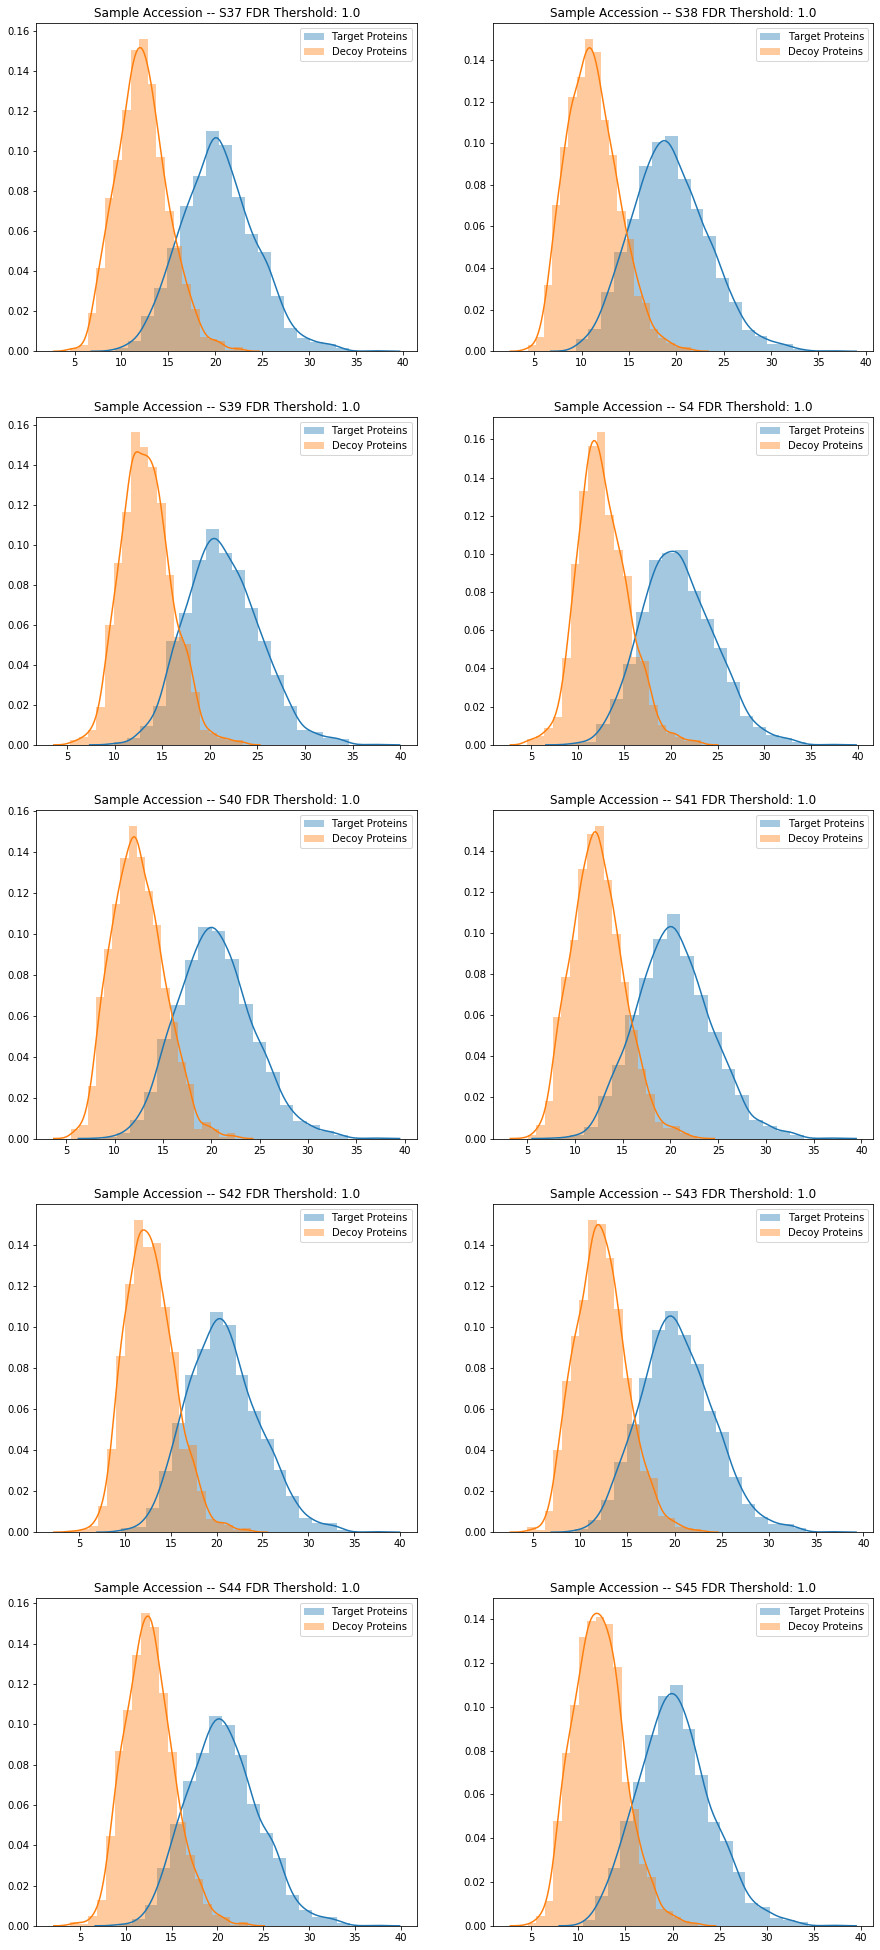

In [288]:
plot_targets_vs_decoy(fdr_thershold = 1.0)

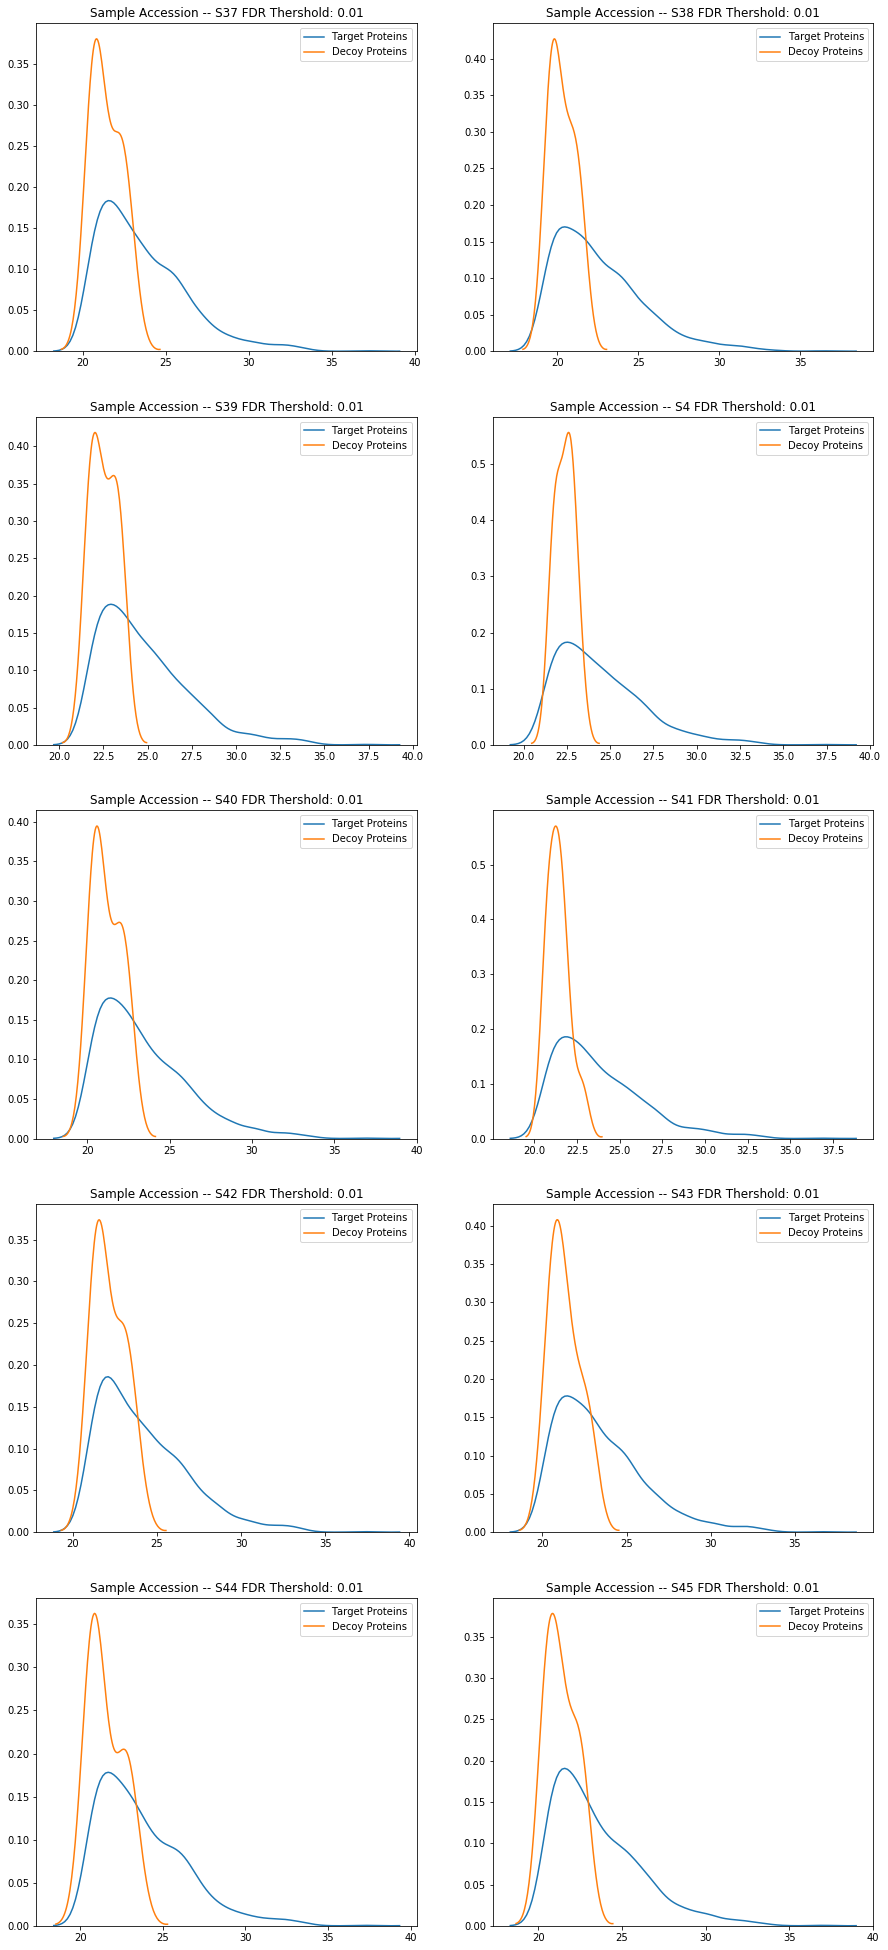

In [290]:
plot_targets_vs_decoy(fdr_thershold = 0.01, bins = 50, hist = False)